In [ ]:
pip install openpyxl

In [ ]:
pip install jieba

In [ ]:
pip install wordcloud

In [1]:
# 导入所需的模块
import re # 正则表达式
import jieba # jieba分词
import numpy as np # numpy数组
import pandas as pd # pandas 表格
import matplotlib.pyplot as plt # 数据可视化
import openpyxl # 用于读取excel
from wordcloud import wordcloud # 用于绘画词云图

In [2]:
data = pd.read_excel('../data/动画信息.xlsx',engine='openpyxl') # 读取数据

In [3]:
# 导入停止词表
stop_words = []
with open('../data/cn_stopwords.txt', encoding='utf-8') as stop_words_file:
    for line in stop_words_file.readlines():
        stop_words.append(line.strip('\n'))
stop_words = set(stop_words) # 将列表转化为集合，提高查询效率


# 数据预处理：动画简介
intro_texts = data.loc[:, '动画简介']
intro_texts = [
    [word for word in jieba.lcut(intro_text) 
    if word not in stop_words
    and re.match(r'[a-zA-Z\s,.\'\"・·…0-9「」【】!—-]', word) is None] 
    for intro_text in intro_texts] # 分词 + 去除停止词 + 去除特殊符号

# 数据预处理：动画名
title_texts = data.loc[:, '动画名']
title_texts = [
    [word for word in jieba.lcut(title_text) 
    if word not in stop_words
    and re.match(r'[a-zA-Z\s,.\'\"・·…0-9「」【】!—-]', word) is None]
    for title_text in title_texts] # 分词 + 去除停止词 + 去除特殊符号

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.778 seconds.
Prefix dict has been built successfully.


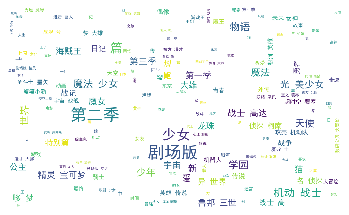

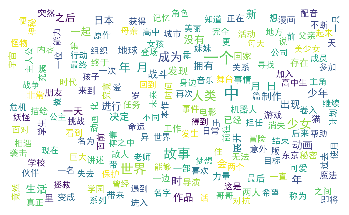

In [4]:
# 针对标题和简介的分词结果绘画词云图

examples = [' '.join(example) for example in title_texts]
examples = ' '.join(examples)

wc = wordcloud.WordCloud(
    font_path='../data/simhei.ttf',  # 字体路径
    background_color='white',  # 背景颜色
    width=1000,
    height=600,
    max_font_size=50,  # 字体大小
    min_font_size=10,
    max_words=1000
)
wc.generate(examples)

# 显示图片
plt.figure('./wordcloud')  # 图片显示的名字
plt.imshow(wc)
plt.axis('off')  # 关闭坐标
plt.show()

examples = [' '.join(example) for example in intro_texts]
examples = ' '.join(examples)

wc = wordcloud.WordCloud(
    font_path='../data/simhei.ttf',  # 字体路径
    background_color='white',  # 背景颜色
    width=1000,
    height=600,
    max_font_size=50,  # 字体大小
    min_font_size=10,
    max_words=200
)
wc.generate(examples)

# 显示图片
plt.figure('./wordcloud')  # 图片显示的名字
plt.imshow(wc)
plt.axis('off')  # 关闭坐标
plt.show()